# House price prediciton using Linear Regression

## importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
houseDF = pd.read_csv('USA_Housing.csv', sep=',')

In [3]:
houseDF.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
houseDF.rename(columns={'Avg. Area Income':'avg_income', 
                        'Avg. Area House Age':'avg_age', 
                        'Avg. Area Number of Rooms':'avg_rooms', 
                        'Avg. Area Number of Bedrooms':'avg_bedrooms',
                        'Area Population':'area_pop'}, inplace=True)

In [5]:
houseDF = houseDF.drop(columns='Address')

In [6]:
houseDF

,avg_income,avg_age,avg_rooms,avg_bedrooms,area_pop,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06


# data exploration and visualisaton

In [1]:
houseDF.describe()

NameError: name 'houseDF' is not defined

In [8]:
houseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   avg_income    5000 non-null   float64
 1   avg_age       5000 non-null   float64
 2   avg_rooms     5000 non-null   float64
 3   avg_bedrooms  5000 non-null   float64
 4   area_pop      5000 non-null   float64
 5   Price         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


<AxesSubplot:>

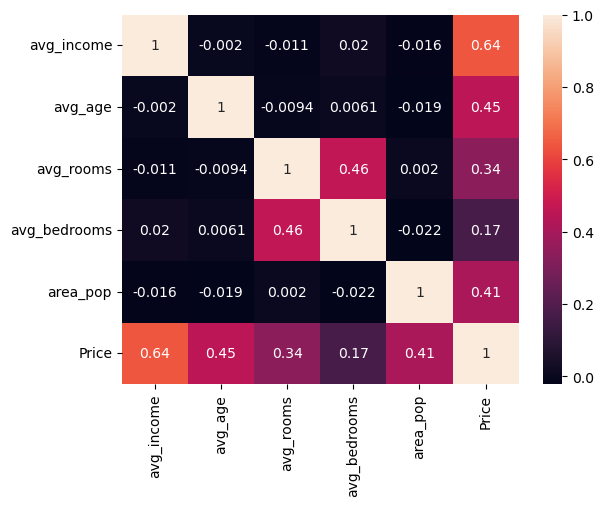

In [9]:
sns.heatmap(houseDF.corr(), annot=True)

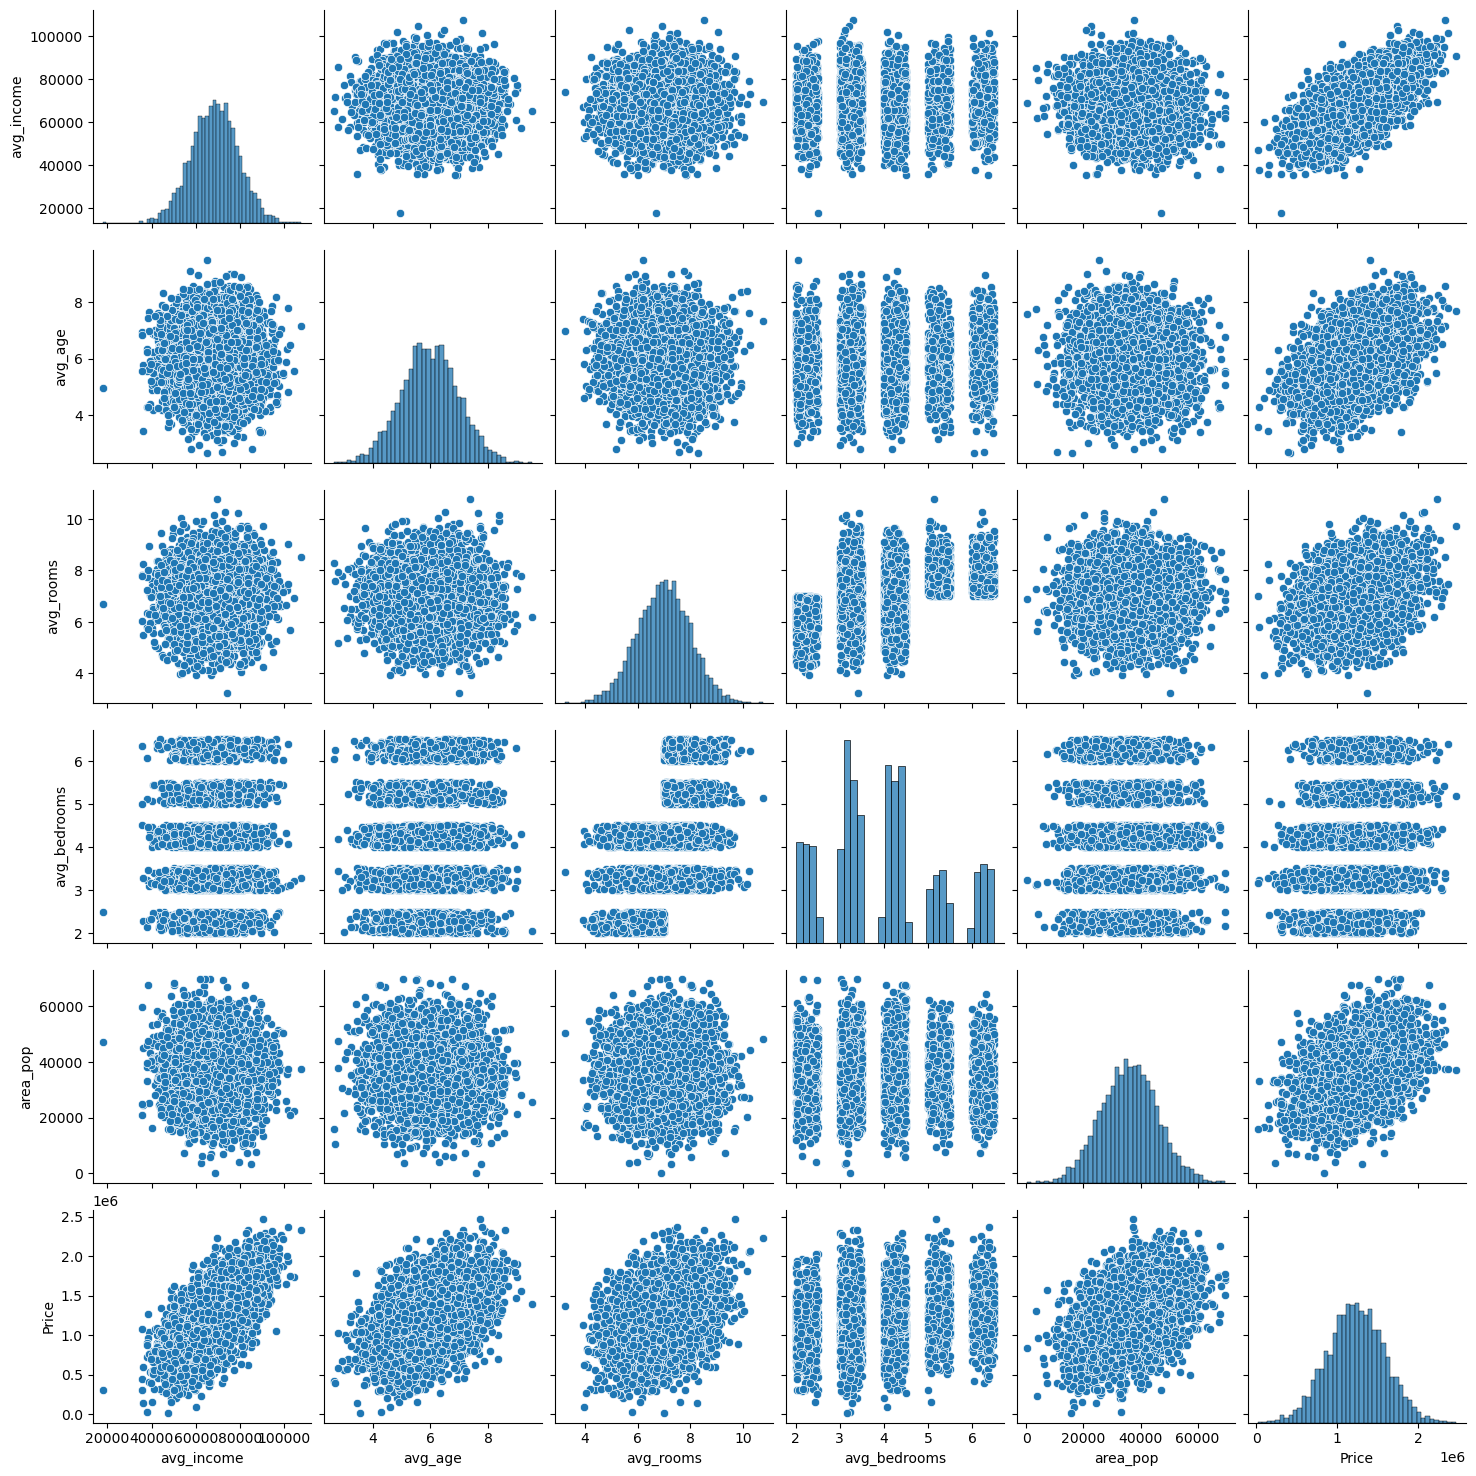

In [30]:
sns.pairplot(houseDF)
plt.show()

In [11]:
houseDF.columns

Index(['avg_income', 'avg_age', 'avg_rooms', 'avg_bedrooms', 'area_pop',
       'Price'],
      dtype='object')

In [12]:
x = houseDF[['avg_income', 'avg_age', 'avg_rooms', 'area_pop']]

y = houseDF[['Price']]

In [13]:
x

,avg_income,avg_age,avg_rooms,area_pop
0,79545.45857,5.682861,7.009188,23086.80050
1,79248.64245,6.002900,6.730821,40173.07217
2,61287.06718,5.865890,8.512727,36882.15940
3,63345.24005,7.188236,5.586729,34310.24283
4,59982.19723,5.040555,7.839388,26354.10947
...,...,...,...,...
4995,60567.94414,7.830362,6.137356,22837.36103
4996,78491.27543,6.999135,6.576763,25616.11549
4997,63390.68689,7.250591,4.805081,33266.14549
4998,68001.33124,5.534388,7.130144,42625.62016


In [14]:
y

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05
...,...
4995,1.060194e+06
4996,1.482618e+06
4997,1.030730e+06
4998,1.198657e+06


# Importing StandardScaler for scaling the values

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

cols = x.columns

x = scaler.fit_transform(x)

In [17]:
x

array([[ 1.02865969, -0.29692705,  0.02127433, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611,  0.40399945],
       [-0.68462915, -0.11230283,  1.5162435 ,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  1.04162464]])

# Splitting dataset into train and test

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=101)

# Training the model

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [21]:
prediction = model.predict(x_test)

# Calculating r2_score of the model which we got 0.92120064207841

In [22]:
from sklearn.metrics import r2_score
score = r2_score(y_test, prediction)
print(f'Model r2_score is {score}')

Model r2_score is 0.92120064207841


# Calculating coefficient

In [23]:
coef = pd.DataFrame(data=model.coef_.reshape(-1,1), index=cols,columns=['Coefficient'])

In [24]:
coef

,Coefficient
avg_income,229874.520672
avg_age,164071.425572
avg_rooms,122339.413784
area_pop,152189.956066


# Plotting Predicted and actual prices

Text(0.5, 1.0, 'Graph of testing data vs predicted data.csv')

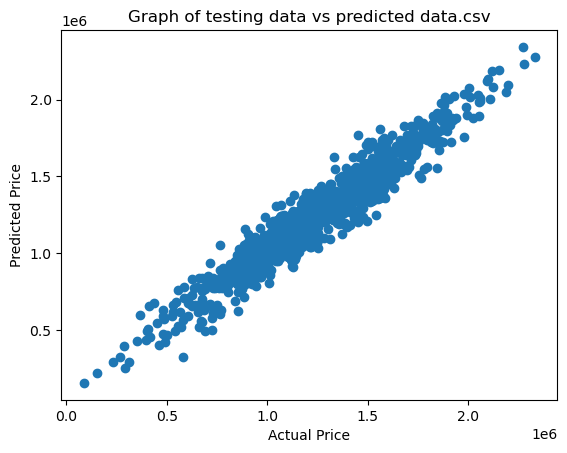

In [25]:
plt.scatter(y_test, prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Graph of testing data vs predicted data.csv')

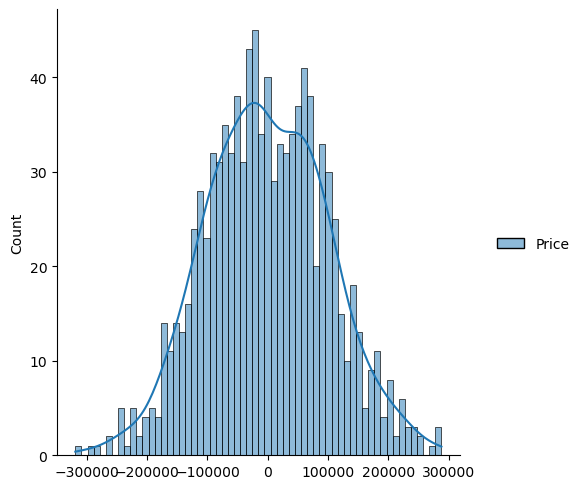

In [26]:
sns.displot((y_test-prediction), kde=True, bins=60)

# Prediction on new Data

In [27]:
new_data = np.array([[21523.17956, 7.17982, 6.370410989, 31455.23866]])
new_data = scaler.fit_transform(new_data)

new_prediction = model.predict(new_data)
print(f'Predicted house price is {new_prediction[0][0]}')

Predicted house price is 1232342.4792505084
